In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

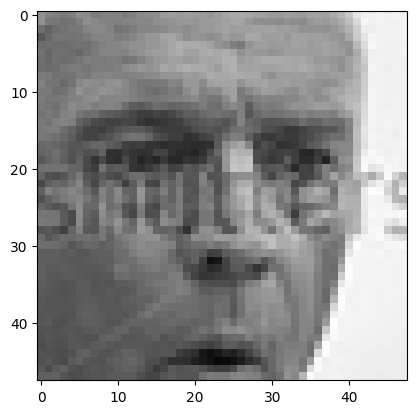

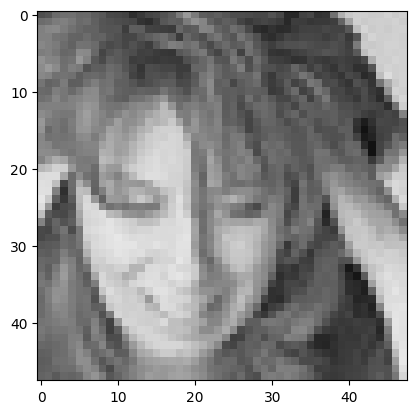

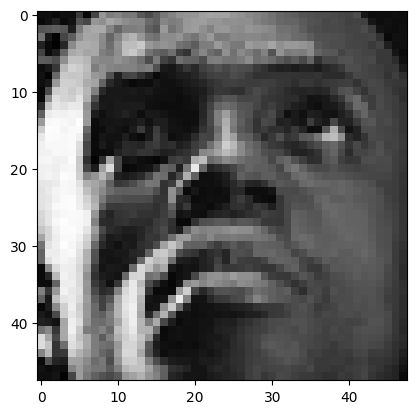

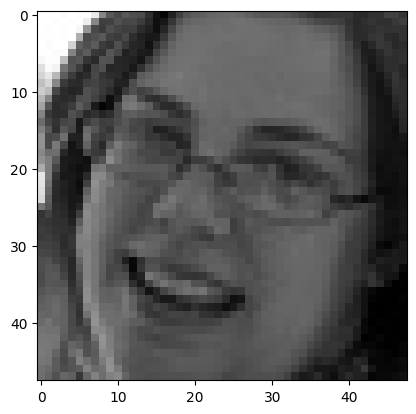

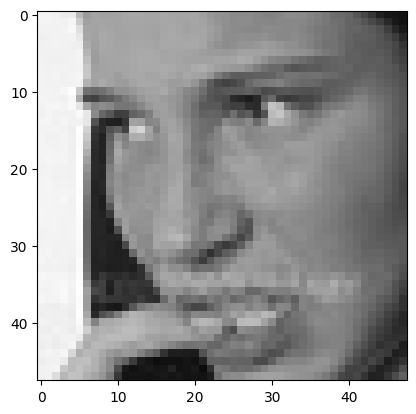

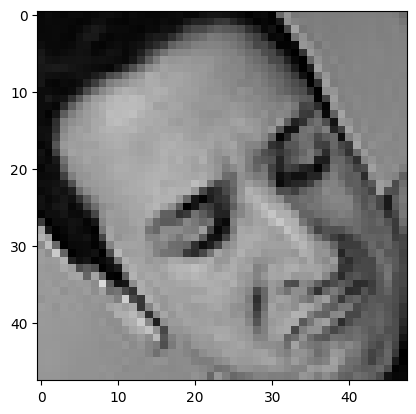

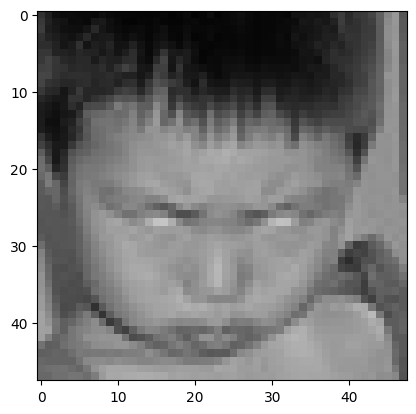

28709


In [2]:
Datadirectory = "C:\\Users\\arnav\\Downloads\\archive (3)\\train"
classes = ["0", "1", "2", "3", "4", "5", "6"]

# Assuming you've defined img_size somewhere in your code
img_size = 224  # Change this to the desired size

for category in classes:
    path = os.path.join(Datadirectory, category)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break

training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

# Call the function to create training data
create_training_data()

# Print the length of training_data
print(len(training_data))


In [3]:
print(len(training_data))

28709


In [4]:
import random

# ... (your existing code)

# Sample a subset of the data
subset_size = 500  # You can adjust this value based on available memory
subset_data = random.sample(training_data, subset_size)

x = []
y = []

for features, label in subset_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)
x = x / 255.0

# ... (continue with your code)


In [5]:
x.shape

(500, 224, 224, 3)

In [6]:
Y = np.array(y)

In [7]:
Y.shape

(500,)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
import tensorflow as tf

model = tf.keras.applications.MobileNetV2()


14536120/14536120 [==============================] - 2s 0us/step


In [10]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [11]:
base_input = model.layers[0].input

In [12]:
base_output = model.layers[-2].output

In [13]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output)
final_ouput = layer